# Домашнее задание:
1) взять данные отсюда: https://github.com/Laggg/data--for--students (flight_delays.csv)

Задача: научиться предсказывать задержку (столбик *dep_delayed_15min*) рейса по имеющимся данным с помощью Дерева решений (или других алгоритмов).
Это задача бинарной классификации (будет/не будет задержка). Улучшить приведенный пример.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


import itertools
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def plot_confusion_matrix(targets,predictions,classes,
                          normalize=False,title='Confusion matrix',
                          figsize=(4, 4), cmap=plt.cm.Reds):

    conf_matrix = confusion_matrix(y_true=targets, y_pred=predictions)

    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title.lower()

    plt.figure(figsize=figsize)
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):

        if normalize:
            value = '{} %'.format(format(conf_matrix[i, j] * 100, '.2f'))
        else:
            value = format(conf_matrix[i, j], fmt)

        plt.text(j,i,value,horizontalalignment="center",color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

In [2]:
path_to_file = 'flight_delays.csv'
data = pd.read_csv('flight_delays.csv')
data.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [3]:
# Отделим столбик-таргет от признаков:
target = (data['dep_delayed_15min'] == 'Y').astype(int)

data = data.drop(['dep_delayed_15min'], axis=1)
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732
1,c-4,c-20,c-3,1548,US,PIT,MCO,834
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423


In [4]:
# возьмем несколько столбцов данных как признаки, по которым будем предсказывать:
X = data[['DepTime','Distance', 'Month']]
X['DepTime'] = X['DepTime']//100
X['Month'] = X['Month'].apply(lambda x: int(x[2:]))
X.head()

,DepTime,Distance,Month
0,19,732,8
1,15,834,4
2,14,416,9
3,10,872,11
4,18,423,10


In [5]:
# разделим выборку на обучающую и тестовую(валидационную, проверочную, отложенная)
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.1, random_state=42)

# обучим модель дерева на обучающей выборке и предскажем на отложенной:
model = DecisionTreeClassifier(max_depth=40, min_samples_split=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Общее число совпадений 0.7455
Полнота охвата класса 1: 0.22597402597402597
Точность: 0.29194630872483224


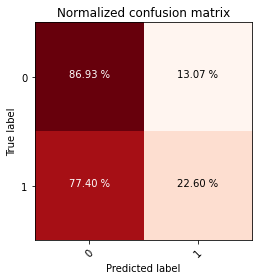

In [6]:
# матрица ошибок алгоритма. При хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений', accuracy_score(y_test, y_pred))
print('Полнота охвата класса 1:', recall_score(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0,1], normalize=True)

подсказка - для работы с категориальными признаками прочитайте про Label Encoder и OneHot Encoder

дедлайн - через неделю, 19.05.2020. Удачи!)

In [7]:
# возьмем несколько столбцов данных как признаки, по которым будем предсказывать:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
X = data[['DepTime','Distance', 'Month', 'DayOfWeek', 'DayofMonth', 'Dest', 'Origin']]
X['DayOfWeek'] = X['DayOfWeek'].apply(lambda x: int(x[2:]))
X['Month'] = X['Month'].apply(lambda x: int(x[2:]))
X['DayofMonth'] = X['DayofMonth'].apply(lambda x: int(x[2:]))

_dict1 = {1:1, 2:1, 3:2, 4:2, 5:2, 6:3, 7:3, 8:3, 9:4, 10:4, 11:4, 12:1}
X['Seasons'] = X['Month'].apply(lambda x: _dict1[x])
#print(X)

labelencoder = LabelEncoder()
X['Origin'] = labelencoder.fit_transform(X['Origin'])
X['Dest'] = labelencoder.fit_transform(X['Dest'])

#Нормировка
X['Distance'] = StandardScaler().fit_transform(np.array(X['Distance']).reshape(100000,1))
X['DepTime'] = X['DepTime']//100
X['DepTime'] = X['DepTime'].apply(lambda x: x-24 if x > 23 else x)
# X['DepTime'] = StandardScaler().fit_transform(np.array(X['DepTime']).reshape(100000,1))
#X = StandardScaler().fit(X).transform(X)
pd.DataFrame(X).head()

,DepTime,Distance,Month,DayOfWeek,DayofMonth,Dest,Origin,Seasons
0,19,0.004530,8,7,21,78,18,3
1,15,0.182040,4,3,20,171,217,2
2,14,-0.545405,9,5,2,59,228,4
3,10,0.248172,11,6,25,175,78,4
4,18,-0.533223,10,6,7,199,174,4


In [8]:
X.shape

(100000, 8)

In [9]:
onehotencoder = OneHotEncoder(categorical_features = [0,2,3,4,5,6,7])
X = onehotencoder.fit_transform(X).toarray()

In [10]:
X.shape

(100000, 657)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.1, random_state=42)

In [12]:
model = DecisionTreeClassifier(max_depth=40, min_samples_split=2)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Общее число совпадений 0.7933
Полнота охвата класса 1: 0.21194805194805194
Точность: 0.42588726513569936


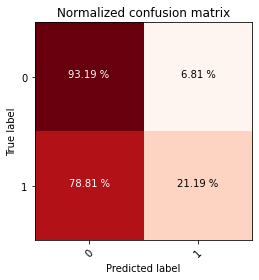

In [13]:
#с помощью того же дерева с другими данными
# матрица ошибок алгоритма. При хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений', accuracy_score(y_test, y_pred))
print('Полнота охвата класса 1:', recall_score(y_test, y_pred))
print('Точность:', precision_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, [0,1], normalize=True)
#Результат улучшился

In [14]:
#Напишем сетку на pytorch))0
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [15]:
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(np.array(x_train)), torch.FloatTensor(np.array(y_train)))

In [16]:
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(np.array(x_test)))

In [17]:
train_loader = DataLoader(dataset=train_data, batch_size=60, shuffle=True)

In [18]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer_1 = nn.Linear(657, 5000)
        self.layer_2 = nn.Linear(5000, 1500)
        self.layer_3 = nn.Linear(1500, 400)
        self.layer_out = nn.Linear(400, 1)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(p=0.05)
        # self.batchnorm1 = nn.BatchNorm1d(batch_size)
        # self.batchnorm2 = nn.BatchNorm1d(batch_size)
        # self.batchnorm3 = nn.BatchNorm1d(batch_size)
    def forward(self, _input):
        # x = self.batchnorm1(x)
        # x = self.batchnorm2(x)
        # x = self.batchnorm3(x)
        # x = self.dropout(x)
        x = self.relu(self.layer_1(_input))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return x

In [19]:
net = Net().cuda()
inputs, output = next(iter(train_loader))
outputs = net(inputs.cuda())
print(outputs.view(1, -1))
print(torch.max(outputs.view(1, -1), 1))
totalloos = []

tensor([[-0.0035, -0.0134, -0.0084, -0.0080, -0.0132, -0.0094, -0.0049, -0.0097,
         -0.0071, -0.0094, -0.0071, -0.0096, -0.0041, -0.0094, -0.0088, -0.0133,
         -0.0047, -0.0088, -0.0084, -0.0074, -0.0143, -0.0071, -0.0105, -0.0113,
         -0.0086, -0.0044, -0.0059, -0.0049, -0.0114, -0.0129, -0.0062, -0.0118,
         -0.0029, -0.0080, -0.0041, -0.0060, -0.0047, -0.0062, -0.0075, -0.0081,
         -0.0050, -0.0105, -0.0090, -0.0110, -0.0067, -0.0082, -0.0108, -0.0064,
         -0.0083, -0.0144, -0.0059, -0.0110, -0.0099, -0.0052, -0.0132, -0.0101,
         -0.0060, -0.0030, -0.0031, -0.0114]], device='cuda:0',
       grad_fn=<ViewBackward>)
torch.return_types.max(
values=tensor([-0.0029], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([32], device='cuda:0'))


In [20]:
import torch.optim as optim

total_acc = []
total_los = []

In [21]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(y_pred)
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    return acc

In [22]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss().cuda()

In [23]:
for epoch in range(40):  # loop over the dataset multiple times
    epoch_loss = 0
    for i, data in enumerate(train_loader, 0):
        inputs, output = data
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.type(torch.FloatTensor).cuda())
        #print(outputs)

        # print(outputs, inputs, output)
        loss = criterion(outputs.cuda(), output.unsqueeze(1).cuda())
        acc = binary_acc(outputs.cuda(), output.unsqueeze(1).cuda())

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # print statistics
        # running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print(f'Iteration: {epoch*i+0:03} | Loss: {epoch_loss/1000:.5f}')
            total_los.append(epoch_loss/1000)
            epoch_loss = 0

print('Finished Training')

Iteration 000:	\е| Loss: 0.45052
Iteration 999:	\е| Loss: 0.42429
Iteration 1998:	\е| Loss: 0.38510
Iteration 2997:	\е| Loss: 0.32027
Iteration 3996:	\е| Loss: 0.22510
Iteration 4995:	\е| Loss: 0.13034
Iteration 5994:	\е| Loss: 0.07109


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

plt.plot(total_los)

In [ ]:
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
y_preds = []

net.eval()
with torch.no_grad():
    for data_batch in test_loader:
        y_test_pred = net(data_batch.cuda())
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_preds.append(y_pred_tag.cpu().numpy())
y_preds = [a.squeeze().tolist() for a in y_preds]

In [ ]:
# матрица ошибок алгоритма. При хорошем прогнозе на главной диагонали будут стоять цифры, близкие к 100.
print('Общее число совпадений', accuracy_score(y_test, y_preds))
print('Полнота охвата класса 1:', recall_score(y_test, y_preds))
print('Точность:', precision_score(y_test, y_preds))
plot_confusion_matrix(y_test, y_preds, [0,1], normalize=True)